In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#import data from csv
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
#age seems to be missing. Further observation to check its relation with survivability
titanic.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [4]:
#Average age is same for both the cases. Seems that fare and pclass play a role in determining the survivability
titanic.groupby(titanic['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


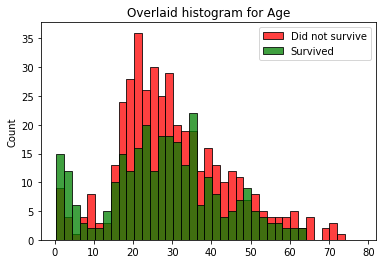

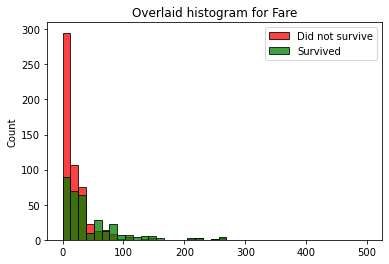

In [5]:
#Null age and Fare seem to have a correlation.
#Null value for age have 10% 
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.histplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.histplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

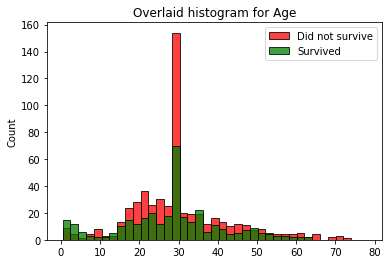

In [6]:
#Lower survival rate for lower fare tickets
#Age distribution is inconclusive to determine its effect on survivability.
#May be possible that kids and infants were given priority over other age groups(inconclusive).

titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.isnull().sum()

died = list(titanic[titanic['Survived'] == 0]['Age'].dropna())
survived = list(titanic[titanic['Survived'] == 1]['Age'].dropna())
xmin = min(min(died), min(survived))
xmax = max(max(died), max(survived))
width = (xmax - xmin) / 40
sns.histplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
sns.histplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
plt.legend(['Did not survive', 'Survived'])
plt.title('Overlaid histogram for {}'.format('Age'))
plt.show()

<Figure size 432x288 with 0 Axes>

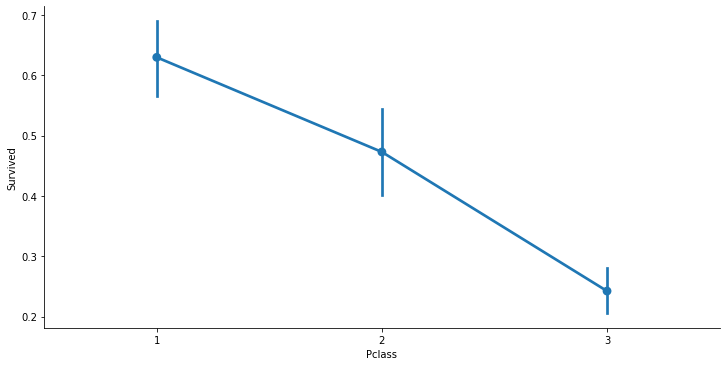

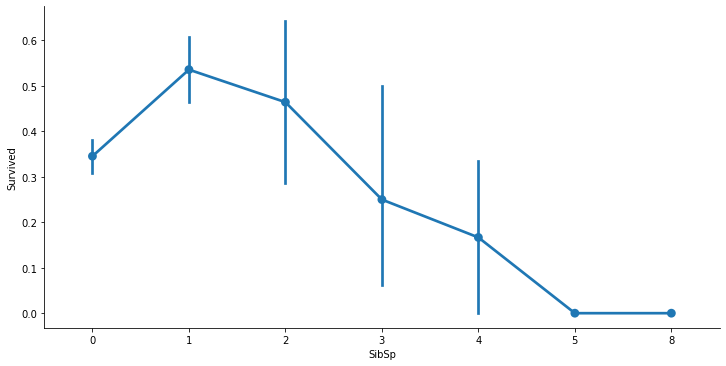

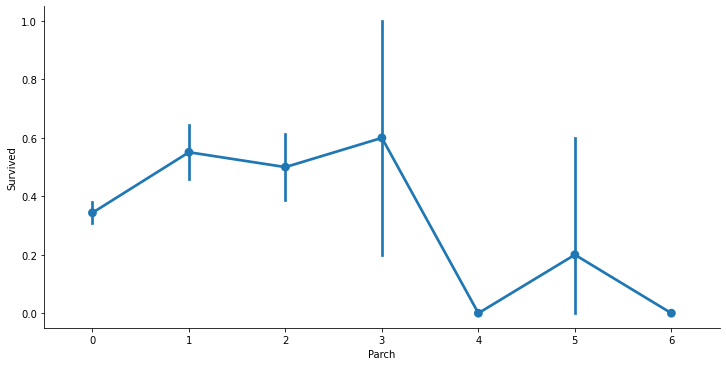

In [7]:
#inconclusive relation b/w age and survivability

for i,col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2)

In [8]:
#lower thw Pclass lower the survivability
#SibSp and Parch have almost the same pattern towards survivability
#In such case, combine SibSp and Parch to a single feature
titanic['family_cnt'] = titanic['SibSp']+titanic['Parch']
titanic.drop(['SibSp', 'Parch', 'PassengerId'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


<Figure size 432x288 with 0 Axes>

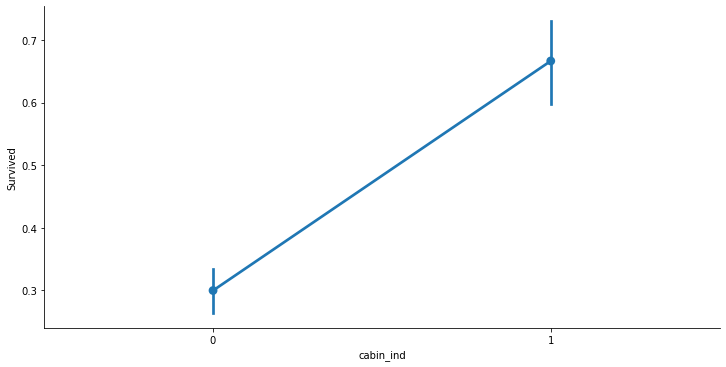

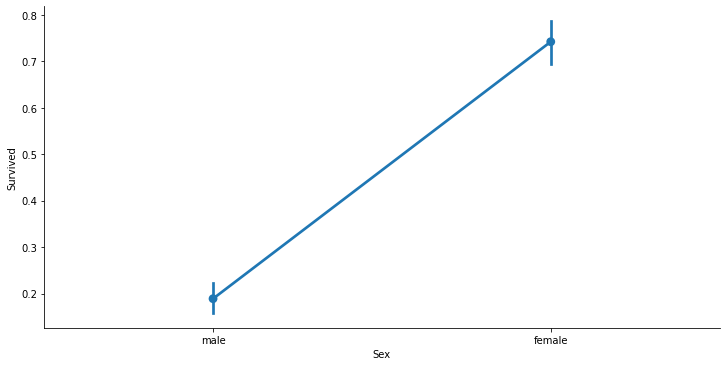

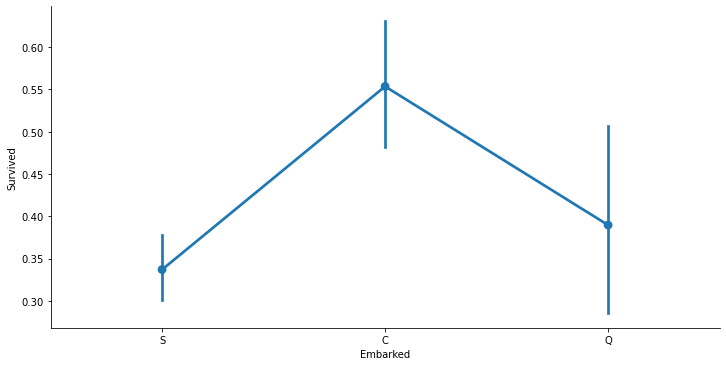

In [9]:
#Encoding categorical features
# titanic['Sex'] = np.where(titanic['Sex'] == 'male', 0, 1)
titanic['cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

# titanic.head()
for i, col in enumerate(['cabin_ind', 'Sex', 'Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [10]:
#no cabin means low survivability. Female given preference over males.
#Embarked location C has more survivability over other locations. Need further observation.
titanic.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')


Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [11]:
titanic.pivot_table('Survived', index='cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
cabin_ind,,,
0,99,73,515
1,69,4,129


In [12]:
#Location C has got more females and less number of passengers with no cabin compared to S.
#May be gender has more influence than cabin_ind. 
gender_num = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_num)
#drop columns other than features
titanic.drop(['Name','Embarked', 'Cabin', 'Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,family_cnt,cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [13]:
titanic.to_csv('titanic_cleaned_features.csv', index=False)